In [2]:
%matplotlib notebook

In [3]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma
import pandas as pd
import os
from mpl_toolkits.axes_grid1 import Divider, Size

In [4]:
def Q2th (deg,lam): # function to convert 2theta into scattering vector, Q
	
	return 4.0*np.pi*np.sin(deg/360.0*np.pi)/lam

In [7]:
data = np.loadtxt('./nuclear/NiCl2pym_sozizo_2K_PND_ORNL_riet_01_fit.dat') #PXRD data file which has been converted to .dat or .xy
rug = np.genfromtxt('./nuclear/NiCl2pym_sozizo_2K_PND_ORNL_riet_01_fit_rug_marks.dat')

<IPython.core.display.Javascript object>


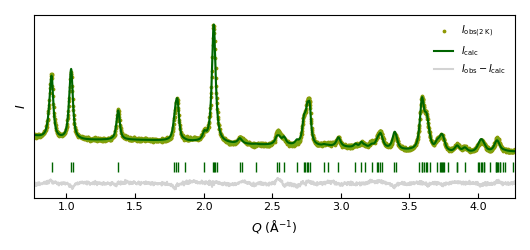

In [8]:
fig = plt.figure(100, figsize=(5.3, 2.5))
ax1 = plt.subplot()
ax1.tick_params(axis='both', labelsize=8, direction="in")

Q = 4*np.pi*np.sin(data[:,0]/2/180*np.pi)/2.41

obs = ax1.scatter (Q,data[:,1]-70, s=3, label='$I_{obs}$', color='xkcd:baby poop green')
calc, = ax1.plot (Q,data[:,2]-70, linewidth=1.5, label='$I_{calc}$', color='darkgreen')
diff, = ax1.plot (Q,data[:,3]+3.5e5, linewidth=1.5, label='$I_{obs}$-$I_{calc}$', color='lightgrey')
plt.fill_between(Q, (data[:,1] - data[:,4]), (data[:,1] + data[:,4]), color='limegreen', alpha=0.2)
ax1.plot(rug[:,4], ([4.5e5]*len(rug)), '|', ms=7, c='darkgreen')

ax1.set_xlabel('$Q$ (Å$^{-1}$)', fontsize=9)
ax1.set_ylabel('$I$', fontsize=9)
ax1.set_xlim((0.76,4.27))
#ax1.set_ylim((-25,450))
plt.yticks([])
plt.xticks(fontsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.legend([obs, calc, diff],['$I_{\mathrm{obs}(2\;\mathrm{K})}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$'], frameon=False, loc='upper right', fontsize=7)
plt.tight_layout()
#plt.savefig('NiCl2pym_sozizo_2K_PND_ORNL_riet_riet.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
plt.show()

In [10]:
riet = np.genfromtxt('./magnetic/NiCl2pym_sozizo_30K-1p5K_PND_ORNL_riet_mZ1-_fit.dat')
d2K = np.loadtxt('NiCl2pym_2p41A_2K.dat')
d30K = np.loadtxt('NiCl2pym_2p41A_30K.dat')
err = np.sqrt((d2K[:,2])**2 + (d30K[:,2])**2)
err = np.sqrt((err[:-1:4])**2 + (err[1::4])**2)
T=d2K[:,0]
T=(T[:-1:4]+T[1::4])/2
start = np.argmax(T>13)
finish = np.argmax(T>60)
err = err[:finish]

In [11]:
rug = np.genfromtxt('./magnetic/NiCl2pym_sozizo_30K-1p5K_PND_ORNL_riet_mZ1-_fit_rug_marks.dat')

<IPython.core.display.Javascript object>


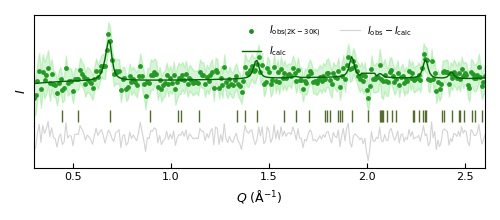

In [12]:
fig = plt.figure(2, figsize=(5, 2.2))
ax1 = plt.subplot()
ax1.tick_params(axis='both', labelsize=8, direction="in")

x = Q2th(riet[:,0],2.41)
sigma = riet[:,4]

offset = 25000
obs = ax1.scatter (x,riet[:,1]+offset, s=6, label='$I_{\mathrm{obs} (2\mathrm{K}-30\mathrm{K})}$', color='forestgreen')

plt.fill_between(x, (riet[:,1] - sigma)+offset, (riet[:,1] + sigma)+offset, color='limegreen', alpha=0.2)

calc, = ax1.plot (x, riet[:,2]+offset, linewidth=1, label='$I_{\mathrm{calc}}$', color='darkgreen')

diff, = ax1.plot (x,riet[:,3]-12000, linewidth=0.8, label='$I_{\mathrm{obs}}-I_{\mathrm{calc}}$', color='lightgrey')
ax1.plot(rug[:,4], ([0.5]*len(rug)), '|',ms=8, c='darkolivegreen')

ax1.set_xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
ax1.set_ylabel('$I$',fontsize=9)
ax1.set_xlim((0.3,2.6))
plt.yticks(ticks=[], labels=[])
ax1.legend([obs, calc, diff],['$I_{\mathrm{obs} (2\mathrm{K}-30\mathrm{K})}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$'],ncol=2, frameon=False, loc='upper center',fontsize=7,bbox_to_anchor=(0.65, 1))
plt.tight_layout()
#plt.savefig('PND_NiCl2pym_sozizo_mag_riet.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
plt.show()

<IPython.core.display.Javascript object>


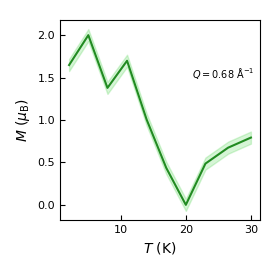

In [13]:
Ni = np.loadtxt('NiCl2pym_2p41A_Temperature_Dependence_2theta15degrees.dat')

fig = plt.figure(figsize=(2.7, 2.6))
ax_len=2
h = [Size.Fixed(0.6), Size.Fixed(ax_len)]
v = [Size.Fixed(0.4), Size.Fixed(ax_len)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
ax1 = fig.add_axes(divider.get_position(),axes_locator=divider.new_locator(nx=1, ny=1))
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 7
ax1.tick_params(axis='both', labelsize=8, direction="in")
M = 2*(Ni[:,1]-np.amin(Ni[:,1]))/(np.amax(Ni[:,1])-np.amin(Ni[:,1]))
e=0.07
Me = np.sqrt( (2*(Ni[:,2])/np.amax(Ni[:,1]))**2 +  e**2)

ax1.plot (Ni[:,0],M, c='forestgreen',label='NiCl$_2$(pym)')
plt.fill_between(Ni[:,0], (M - Me), (M + Me), color='limegreen', alpha=0.2)

ax1.text(21, 1.5, '$Q=0.68$ Å$^{-1}$', fontsize=7)
ax1.set_xlabel('$T$ (K)')
ax1.set_ylabel('$M$ ($\mu_\mathrm{B}$)')
#plt.savefig('Ni-pym_PND_Tdep.pdf',bbox_inches='tight', transparent=True)
plt.show()